# VGG16

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only allocate 5GB of memory on the first GPU
#   try:
#     tf.config.experimental.set_virtual_device_configuration(
#         gpus[0],
#         [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=2048)])
#     logical_gpus = tf.config.experimental.list_logical_devices('GPU')
#     print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
#   except RuntimeError as e:
#     # Virtual devices must be set before GPUs have been initialized
#     print(e)

In [2]:
model_id = "vgg16_test"
train_dir = "../data/sample-ub-9977"
batch_size = 64
image_size = 128

In [4]:
# Data Augmentation Parameters
image_generator = ImageDataGenerator(
    validation_split = 0.2,
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    zoom_range = 0.4,
    fill_mode = 'nearest'
)

In [5]:
train_data_gen = image_generator.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    target_size = (image_size, image_size),
    class_mode = "categorical",
    subset = "training"
)

Found 8001 images belonging to 42 classes.


In [6]:
validation_data_gen = image_generator.flow_from_directory(
    directory = train_dir,
    batch_size = batch_size,
    target_size = (image_size, image_size),
    class_mode = "categorical",
    subset = "validation"
)

Found 1976 images belonging to 42 classes.


In [9]:
model = keras.models.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size = (5, 5), input_shape = (image_size, image_size, 3), activation = "relu"))
model.add(keras.layers.Conv2D(32, kernel_size = (5, 5), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Conv2D(64, kernel_size = (5, 5), activation = "relu"))
model.add(keras.layers.Conv2D(64, kernel_size = (5, 5), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model.add(keras.layers.Conv2D(128, kernel_size = (3, 3), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Conv2D(256, kernel_size = (3, 3), activation = "relu"))
model.add(keras.layers.Conv2D(256, kernel_size = (3, 3), activation = "relu"))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPool2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation = "relu"))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(train_data_gen.n, activation = "softmax"))

In [10]:
model.compile(
    optimizer = keras.optimizers.Adam(),
    loss = keras.losses.CategoricalCrossentropy(),
    metrics = ["accuracy"]
)

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 124, 124, 32)      2432      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 120, 32)      25632     
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 60, 60, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        51264     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 64)        102464    
_________________________________________________________________
batch_normalization_1 (Batch (None, 52, 52, 64)        2

In [14]:
history = model.fit(
    train_data_gen,
    epochs = 20,
    steps_per_epoch = train_data_gen.n // batch_size,
    validation_data = validation_data_gen,
    validation_steps = validation_data_gen.n // batch_size,
#     use_multiprocessing = True,
#     workers = 6,
    callbacks = [
        keras.callbacks.EarlyStopping(patience = 3, restore_best_weights = True, verbose = 1)
#         keras.callbacks.CSVLogger(MODEL_DIR + "{}.csv".format(model_id))
    ]
)

Epoch 1/20
155/155 [==============================] - 23s 146ms/step - loss: 3.8992 - accuracy: 0.0569
Epoch 2/20
155/155 [==============================] - 17s 109ms/step - loss: 3.5122 - accuracy: 0.0959
Epoch 3/20
155/155 [==============================] - 17s 110ms/step - loss: 3.3419 - accuracy: 0.1279
Epoch 4/20
155/155 [==============================] - 17s 110ms/step - loss: 3.1861 - accuracy: 0.1639
Epoch 5/20
155/155 [==============================] - 17s 109ms/step - loss: 3.0142 - accuracy: 0.1994
Epoch 6/20
155/155 [==============================] - 17s 110ms/step - loss: 2.8413 - accuracy: 0.2422
Epoch 7/20
155/155 [==============================] - 16s 105ms/step - loss: 2.6666 - accuracy: 0.2896
Epoch 8/20
155/155 [==============================] - 16s 105ms/step - loss: 2.3935 - accuracy: 0.3471
Epoch 9/20
 69/155 [============>.................] - ETA: 9s - loss: 2.1864 - accuracy: 0.3863

KeyboardInterrupt: 

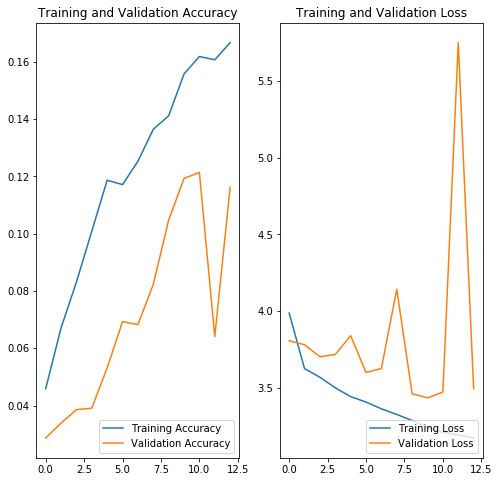

In [11]:
acc = history.history["accuracy"]
loss = history.history["loss"]
validation_acc = history.history["val_accuracy"]
validation_loss = history.history["val_loss"]

epochs_range = range(len(history.history["accuracy"]))

plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, validation_acc, label = "Validation Accuracy")
plt.legend(loc = "lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, validation_loss, label = "Validation Loss")
plt.legend(loc = "lower right")
plt.title("Training and Validation Loss")
plt.show()

In [12]:
# model.save(MODEL_DIR + "{}.h5".format(model_id), overwrite = False)